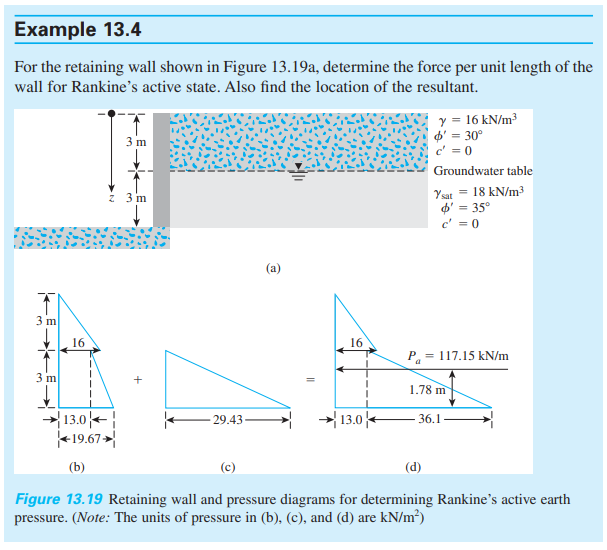

In [9]:
# Import pandas for use of dataframes
import pandas as pd

# Import the SoilProfile class from geotechpy to calculate the total and effective stresses
from geotechpy.soil_profile import SoilProfile

# Import the LateralEarthPressure class from geotechpy to calculate the lateral earth pressure
from geotechpy.lateral_earth_pressure import LateralEarthPressure

# Import the 
from geotechpy.constants import get_constants

# Show all columns of the dataframes
pd.set_option("display.max_columns", None)

In [10]:
# Read the soil profile data from a CSV file and store it in a dataframe

sp_df = pd.read_csv("soil_profile_Das_13_4.csv")

sp_df

,layer_id,top_elevation,bottom_elevation,soil_classification,moist_unit_weight,saturated_unit_weight,drained_friction_angle,drained_cohesion,undrained_friction_angle,undrained_cohesion
0,1.0,100,97,Silty sand,16,16,30,0,NaN,NaN
1,NaN,97,94,Sand,16,18,35,0,NaN,NaN


In [11]:
# Declare the variables needed for the SoilProfile and LateralEarthPressure classes

# The SoilProfile class needs the sp_df dataframe, uniform surcharge, water surface elevation, and the units system used.

# The LateralEarthPressure class needs the soil_profile.dataframe, backfill slope angle, wall back face agle from vertical, 
# wall interface friction angle, and the units system used.

# The calculations for at-rest earth pressures require input for OCR.

# Declare the uniform surcharge in kPa or psf
uniform_surcharge = 0

# Declare the water surface elevation in m or ft
water_surface_elevation = 97

# Declare the backfill slope angle in degrees
backfill_slope_angle = 0

# Declare the wall back face angle from vertical in degrees
wall_back_face_angle = 0

# Declare the wall interface friction angle in degrees
wall_interface_friction_angle = 0

# Declare the OCR for at-rest earth pressures
OCR = 1

# Declare the units system used, metric or imperial
units = "metric"



In [12]:
# Create a SoilProfile object from the dataframe
soil_profile = SoilProfile(sp_df, uniform_surcharge, water_surface_elevation, units)

# Calculate the total and effective stresses using the calculate_all() method
soil_profile.calculate_all()

# Display the soil profile dataframe
soil_profile.dataframe

# Note that the layer containing the water surface elevation has been split into two layers, one above and one below the water surface elevation.

,layer_id,top_elevation,bottom_elevation,soil_classification,moist_unit_weight,saturated_unit_weight,drained_friction_angle,drained_cohesion,undrained_friction_angle,undrained_cohesion,effective_unit_weight,total_unit_weight,layer_height,top_effective_stress,bottom_effective_stress,middle_effective_stress,top_water_pressure,bottom_water_pressure,top_total_stress,bottom_total_stress,middle_total_stress
0,1.0,100,97,Silty sand,16,16,30,0,NaN,NaN,16.00,16,3,0.0,48.00,24.000,0.0,0.00,0.0,48.0,24.0
1,NaN,97,94,Sand,16,18,35,0,NaN,NaN,8.19,18,3,48.0,72.57,60.285,0.0,29.43,48.0,102.0,75.0


In [13]:
# Create a LateralEarthPressure object from the soil_profile object
lateral_earth_pressure = LateralEarthPressure(soil_profile.dataframe, backfill_slope_angle, wall_back_face_angle, wall_interface_friction_angle, units)

# Calculate the active lateral earth coefficient, pressure and force using the calculate_active_all() method.
lateral_earth_pressure.calculate_rankine_active_all()

# Display the lateral earth pressure dataframe
lateral_earth_pressure.dataframe

,layer_id,top_elevation,bottom_elevation,soil_classification,moist_unit_weight,saturated_unit_weight,drained_friction_angle,drained_cohesion,undrained_friction_angle,undrained_cohesion,effective_unit_weight,total_unit_weight,layer_height,top_effective_stress,bottom_effective_stress,middle_effective_stress,top_water_pressure,bottom_water_pressure,top_total_stress,bottom_total_stress,middle_total_stress,active_coefficient,top_active_pressure,bottom_active_pressure,active_force,active_force_elevation
0,1.0,100,97,Silty sand,16,16,30,0,NaN,NaN,16.00,16,3,0.0,48.00,24.000,0.0,0.00,0.0,48.0,24.0,0.33,0.0,15.8,23.7,98.0
1,NaN,97,94,Sand,16,18,35,0,NaN,NaN,8.19,18,3,48.0,72.57,60.285,0.0,29.43,48.0,102.0,75.0,0.27,13.0,19.6,48.9,95.4


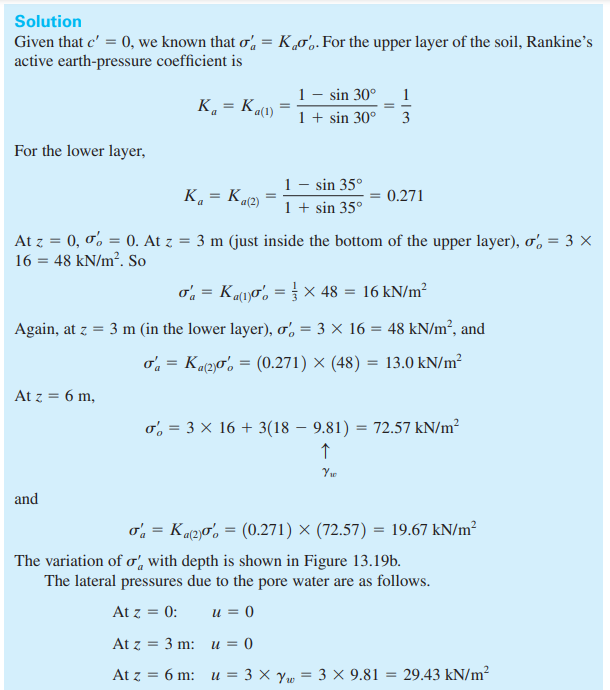

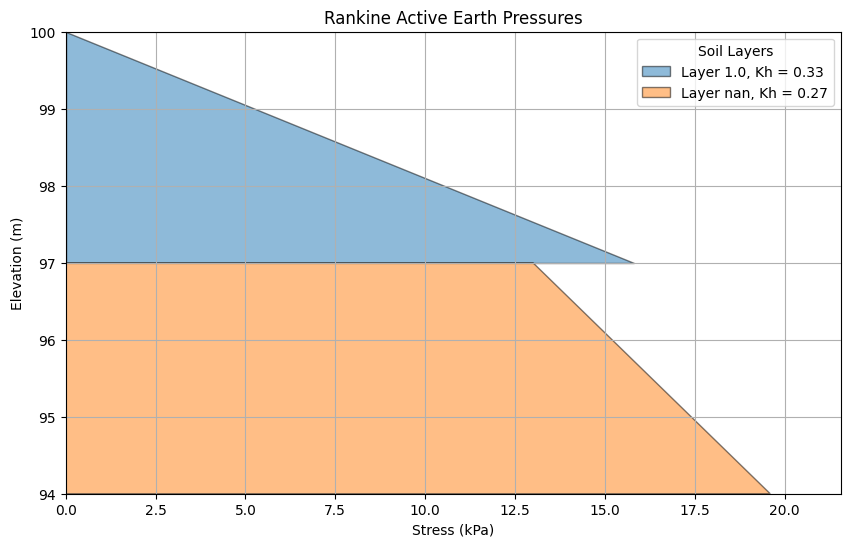

In [14]:
# Plot the lateral earth pressure diagram using the 
lateral_earth_pressure.plot_rankine_active_pressures()

In [15]:
# Calculate the moment due to active forces using the calculate_active_moment() method.
wall_bottom_elevation = 94

lateral_earth_pressure.calculate_active_moment(wall_bottom_elevation)

# calculate the water force using the calculate_water_all() method.
lateral_earth_pressure.calculate_water_all()

# Calculate the moment due to water forces using the calculate_water_moment() method.
lateral_earth_pressure.calculate_water_moment(wall_bottom_elevation)

lateral_earth_pressure.dataframe

,layer_id,top_elevation,bottom_elevation,soil_classification,moist_unit_weight,saturated_unit_weight,drained_friction_angle,drained_cohesion,undrained_friction_angle,undrained_cohesion,effective_unit_weight,total_unit_weight,layer_height,top_effective_stress,bottom_effective_stress,middle_effective_stress,top_water_pressure,bottom_water_pressure,top_total_stress,bottom_total_stress,middle_total_stress,active_coefficient,top_active_pressure,bottom_active_pressure,active_force,active_force_elevation,active_moment,water_force,water_force_elevation,water_moment
0,1.0,100,97,Silty sand,16,16,30,0,NaN,NaN,16.00,16,3,0.0,48.00,24.000,0.0,0.00,0.0,48.0,24.0,0.33,0.0,15.8,23.7,98.0,94.8,0.0,NaN,NaN
1,NaN,97,94,Sand,16,18,35,0,NaN,NaN,8.19,18,3,48.0,72.57,60.285,0.0,29.43,48.0,102.0,75.0,0.27,13.0,19.6,48.9,95.4,68.5,44.1,95.0,44.1


In [16]:
# Calculate the total active force as the sum of the active force values
total_active_force = lateral_earth_pressure.dataframe["active_force"].sum()

# Calculate the total water force as the sum of the water force values
total_water_force = lateral_earth_pressure.dataframe["water_force"].sum()

# Calculate the total driving force as the sum of the active and water force values
total_driving_force = total_active_force + total_water_force

# Calculate the total active moment as the sum of the active moment values
total_active_moment = lateral_earth_pressure.dataframe["active_moment"].sum()

# Calculate the total water moment as the sum of the water moment values
total_water_moment = lateral_earth_pressure.dataframe["water_moment"].sum()

# Calculate the total driving moment as the sum of the active and water moment values
total_driving_moment = total_active_moment + total_water_moment

# Calculate the elevation of the resultant force as the total driving moment divided by the total driving force
resultant_elevation = total_driving_moment / total_driving_force



# Display the total driving force and its elevation
force_units = get_constants(units)["force_units"]
length_units = get_constants(units)["length_units"]
print("Total driving force: {:.1f} {} per unit width of wall".format(total_driving_force, force_units))
print("Resultant elevation: {:.1f} {} above the bottom of the wall".format(resultant_elevation, length_units))


Total driving force: 116.7 kN per unit width of wall
Resultant elevation: 1.8 m above the bottom of the wall


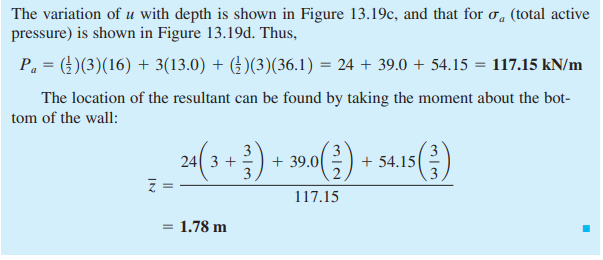